# TODO
- data preprocessing
    - 성별 미분류는 데이터에서 제거
- dummy variable
    - 모든 칼럼을 인코딩.
- pca.. or stepwise?
    - 수업에서 다룬 stepwise...
- visualization
    - not adequate methodology...
- how to make logistic regression...?
    - does logistic regression use gradient descent..?
    - no logistic regression is not necessary

In [5]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
import category_encoders as ce

import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

import warnings

warnings.filterwarnings('ignore')

# korean font issue
plt.rcParams['font.family'] = 'AppleGothic'

In [33]:
raw_data = pd.read_excel('./HMA_rawdata.xlsx', engine='openpyxl', sheet_name=['raw_data'])
raw_data = raw_data['raw_data']
raw_data.describe()

,요일,발송매체,메시지 광고성 여부,메시지 금융 관련 내용 여부,연령대,성별,발송시간대,발송성공여부,최근 30일 간 로그인 일수,메시지 수용 여부
count,144000,144000,144000,144000,144000,144000,144000,144000,144000,144000
unique,6,2,2,2,5,3,3,2,4,2
top,월,푸시,정보성,금융,50대,여자,오전,성공,1일~10일,미수용
freq,24000,72000,72000,72000,38991,73807,48000,140494,101546,140173


In [7]:
# columns
DAY = '요일'
MEDIA = '발송매체'
IS_ADVERTISEMENT = '메시지 광고성 여부'
IS_INCLUDE_FINANCE = '메시지 금융 관련 내용 여부'
AGE = '연령대'
GENDER = '성별'
TIME = '발송시간대'
IS_SUCCESS = '발송성공여부'
LOGIN_DAYS_IN_MONTH = '최근 30일 간  로그인 일수'
IS_APPROVED = '메시지 수용 여부'

raw_data = raw_data[raw_data[GENDER] != '미분류'] # 성별 미분류 제외
raw_X = raw_data.drop(IS_APPROVED, axis=1)
raw_y = raw_data[IS_APPROVED]

<Axes: xlabel='메시지 수용 여부', ylabel='Count'>

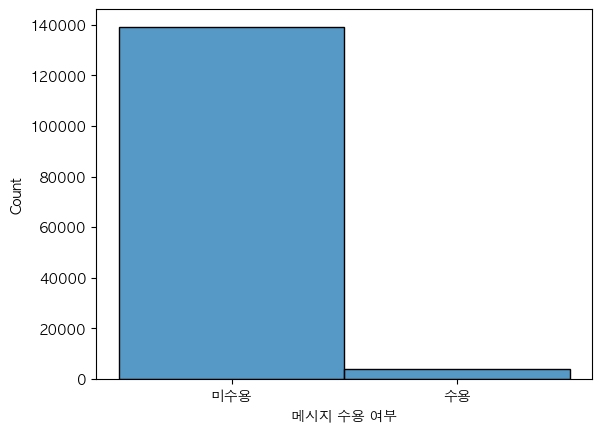

In [8]:
sns.histplot(raw_y)

In [9]:
raw_data.describe()

,요일,발송매체,메시지 광고성 여부,메시지 금융 관련 내용 여부,연령대,성별,발송시간대,발송성공여부,최근 30일 간 로그인 일수,메시지 수용 여부
count,143096,143096,143096,143096,143096,143096,143096,143096,143096,143096
unique,6,2,2,2,5,2,3,2,4,2
top,토,푸시,광고성,금융,50대,여자,점심,성공,1일~10일,미수용
freq,23862,71570,71553,71548,38859,73807,47702,139686,100782,139281


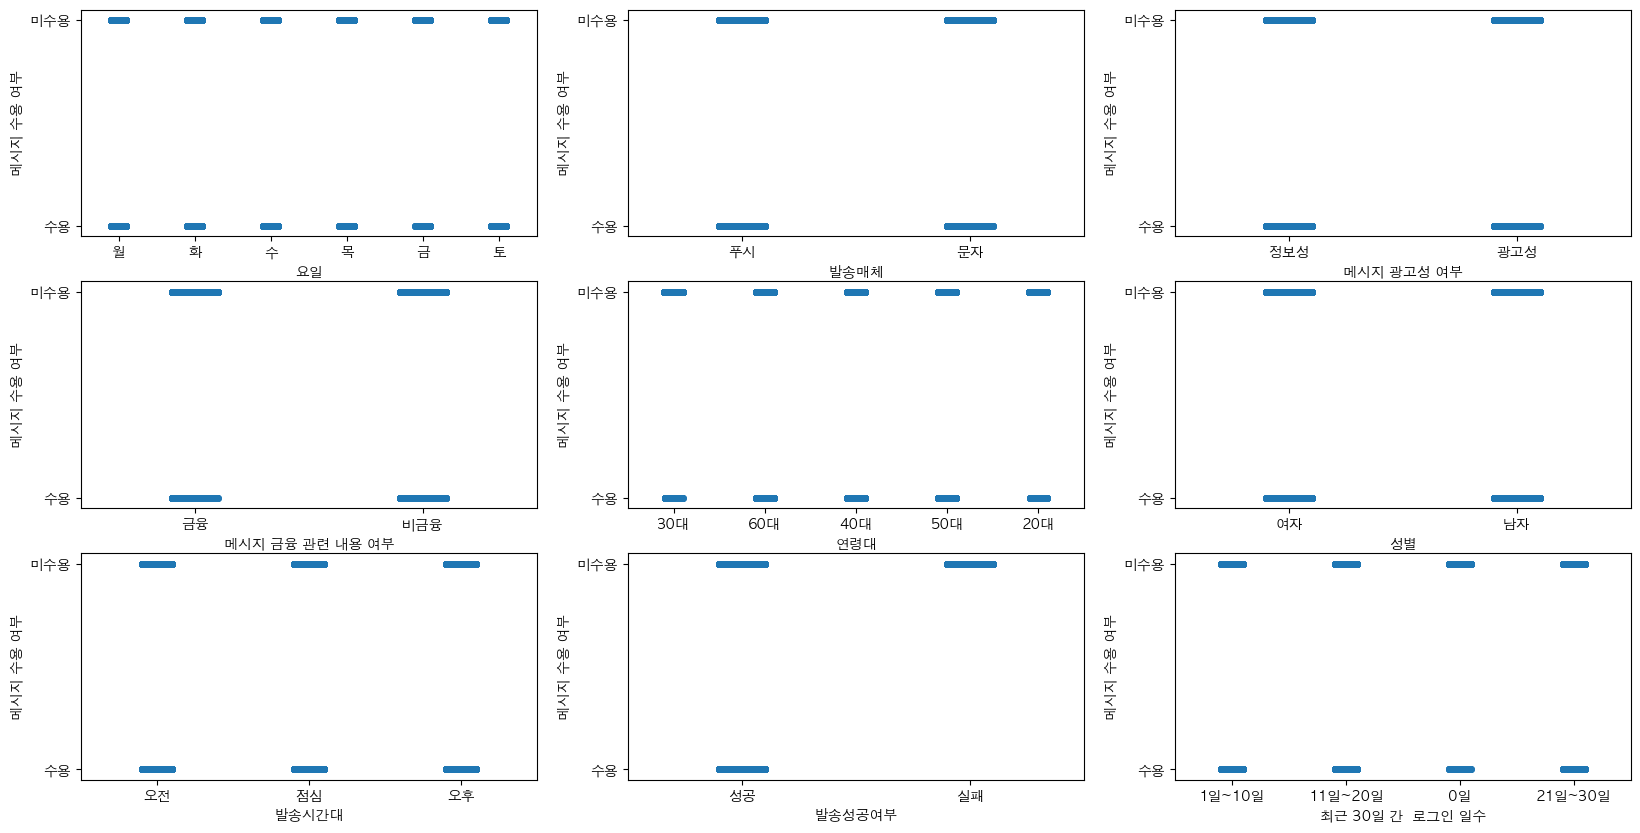

In [10]:
fig, ax = plt.subplots(3, 3)
fig.set_size_inches(20, 10)
x_list = [
    DAY,
    MEDIA,
    IS_ADVERTISEMENT,
    IS_INCLUDE_FINANCE,
    AGE,
    GENDER,
    TIME,
    IS_SUCCESS,
    LOGIN_DAYS_IN_MONTH,
]

for i in range(len(x_list)):
    row = i // 3 
    col = i % 3 
    sns.stripplot(x=x_list[i], y=IS_APPROVED, data=raw_data, ax=ax[row][col])

plt.show()

In [42]:
columns = [
    DAY,
    MEDIA,
    IS_ADVERTISEMENT,
    IS_INCLUDE_FINANCE,
    AGE,
    GENDER,
    TIME,
    LOGIN_DAYS_IN_MONTH,
]

encoder = OneHotEncoder(drop='first', sparse=False)
X = encoder.fit_transform(raw_X.drop(IS_SUCCESS, axis=1))
X = sm.add_constant(X)

y = pd.get_dummies(raw_y, drop_first=True, dtype=int)

names = [''] + [*encoder.get_feature_names_out()]
tmp_X = X.copy()

model = sm.Logit(y, tmp_X).fit()

# Stepwise
while True:
    max_idx = np.argmax(model.pvalues)
    max_p_value = model.pvalues[max_idx]
    if max_p_value > 0.05:
        tmp_X = np.delete(tmp_X, max_idx, axis=1)
        name = names.pop(max_idx)
        model = sm.Logit(y, tmp_X).fit()
        print(model.summary())
        print(f">>> variable {max_idx}: {name} deleted")
    else:
        break


print(model.summary())
params = np.exp(model.params)
print('[beta에 exponential을 취했을 때의 값들]')
for i, param in enumerate(params):
    print(f'>>> {names[i] if i > 0 else "const"}: {param}')

19
Optimization terminated successfully.
         Current function value: 0.111613
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.111614
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                     수용   No. Observations:               143096
Model:                          Logit   Df Residuals:                   143078
Method:                           MLE   Df Model:                           17
Date:                Sun, 24 Dec 2023   Pseudo R-squ.:                 0.09209
Time:                        23:45:08   Log-Likelihood:                -15971.
converged:                       True   LL-Null:                       -17591.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
con

In [30]:
print(pd.crosstab(raw_data[DAY], raw_data[AGE]))
print('=========')
print(pd.crosstab(raw_data[MEDIA], raw_data[AGE]))
print('=========')
print(pd.crosstab(raw_data[IS_ADVERTISEMENT], raw_data[AGE]))
print('=========')
print(pd.crosstab(raw_data[IS_INCLUDE_FINANCE], raw_data[AGE]))
print('=========')
print(pd.crosstab(raw_data[GENDER], raw_data[AGE]))
print('=========')
print(pd.crosstab(raw_data[TIME], raw_data[AGE]))
print('=========')
print(pd.crosstab(raw_data[LOGIN_DAYS_IN_MONTH], raw_data[AGE]))
print('=========')
print(pd.crosstab(raw_data[IS_APPROVED], raw_data[AGE]))
print('=========')

연령대   20대   30대   40대   50대   60대
요일                               
금    3342  4458  6046  6482  3525
목    3228  4500  6215  6418  3497
수    3291  4552  6091  6448  3468
월    3265  4528  6142  6484  3409
토    3375  4464  5950  6541  3532
화    3327  4569  6032  6486  3431
연령대    20대    30대    40대    50대    60대
발송매체                                  
문자    9943  13477  18240  19473  10393
푸시    9885  13594  18236  19386  10469
연령대          20대    30대    40대    50대    60대
메시지 광고성 여부                                  
광고성         9954  13534  18165  19507  10393
정보성         9874  13537  18311  19352  10469
연령대                20대    30대    40대    50대    60대
메시지 금융 관련 내용 여부                                   
금융                9816  13566  18421  19310  10435
비금융              10012  13505  18055  19549  10427
연령대    20대    30대    40대    50대    60대
성별                                    
남자    8004  13040  18698  19031  10516
여자   11824  14031  17778  19828  10346
연령대     20대   30대    40대    50대 